In [1]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.func as func
import mlgrad.risk as risk
import mlgrad.avragg as avragg
# import mlgrad.gd as gd
import mlgrad.regnorm as regnorm
import mlgrad.weights as weights
from mlgrad.utils import array_exclude_outliers

import mlgrad.regr as regr

from mlgrad import averager_it, averager_fg, fg, erm_fg, sg, erm_sg, irgd, erm_irgd, erisk, mrisk

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook', 'seaborn-ticks'])

import sys
print(sys.version)

3.9.2 (default, Feb 28 2021, 17:03:44) 
[GCC 10.2.1 20210110]


In [12]:
df = pd.read_csv("data/data_mortality.csv", sep=',', usecols=["date", "mdeaths", "fdeaths"], )

In [13]:
len(df)

72

In [14]:
df

,date,mdeaths,fdeaths
0,Jan 1974,2134,901
1,Feb 1974,1863,689
2,Mar 1974,1877,827
3,Apr 1974,1877,677
4,May 1974,1492,522
...,...,...,...
67,Aug 1979,975,379
68,Sep 1979,940,393
69,Oct 1979,1081,411
70,Nov 1979,1294,487


In [15]:
Y = df["fdeaths"].values
X = df["mdeaths"].values

print(X)

X = np.asarray(X, 'd')
Y = np.asarray(Y, 'd')

# X -= np.median(X)
# Y -= np.median(Y)

# x_min, x_max = X.min(), X.max()
# X = (X - x_min) / (x_max - x_min)
# y_min, y_max = Y.min(), Y.max()
# Y = (Y - y_min) / (y_max - y_min)

Xs = X.reshape((-1,1))

X0 = np.linspace(X.min(), X.max(), 20)

[2134 1863 1877 1877 1492 1249 1280 1131 1209 1492 1621 1846 2103 2137
 2153 1833 1403 1288 1186 1133 1053 1347 1545 2066 2020 2750 2283 1479
 1189 1160 1113  970  999 1208 1467 2059 2240 1634 1722 1801 1246 1162
 1087 1013  959 1179 1229 1655 2019 2284 1942 1423 1340 1187 1098 1004
  970 1140 1110 1812 2263 1820 1846 1531 1215 1075 1056  975  940 1081
 1294 1341]


In [16]:
from sklearn.preprocessing import scale

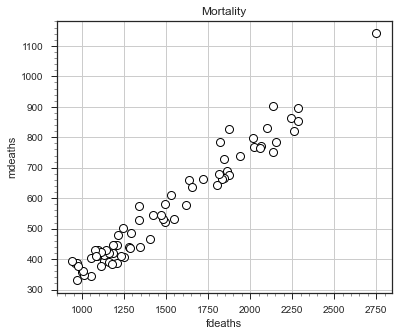

In [18]:
plt.figure(figsize=(6.0, 5.0))
plt.scatter(X, Y, s=64, c='w', edgecolors='k', linewidths=1.)
plt.title('Mortality')
plt.minorticks_on()
plt.grid(1)
plt.xlabel('fdeaths')
plt.ylabel('mdeaths')
# plt.xlim(-0.9, 0.6)
# plt.ylim(-2.5, 2.0)
plt.show()

In [19]:
loss_func_sq = loss.ErrorLoss(func.Square())
# loss_func_rsq = loss.RelativeErrorLoss(func.Square())
loss_func_abs = loss.ErrorLoss(func.Absolute())

In [20]:
sqr_norm = regnorm.SquareNorm()

In [21]:
mod_ls = model.LinearModel(1)
mod_ls.init()

[0.13271267 0.7614729 ] 2


K=1500 param=[-0.26795248  0.37726677]


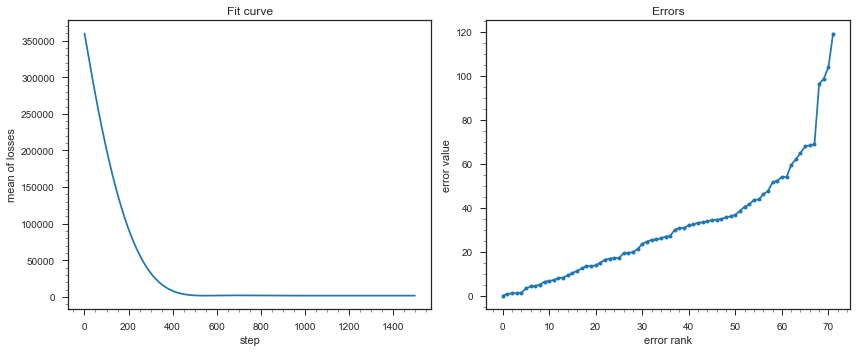

In [22]:
alg_ls = regr.regression(Xs, Y, mod_ls, n_iter=1500, verbose=1)
err_ls = regr.plot_losses_and_errors(alg_ls, Xs, Y)

In [29]:
mod_m_irls = model.LinearModel(1)
mod_m_irls.init()

[0.4087354  0.99763344] 2


K=100 param=[-0.20156918  0.38732886]


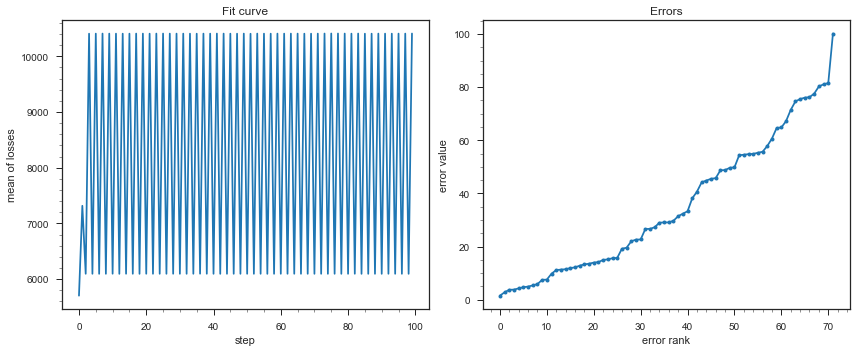

In [30]:
avg_m_irls = regr.averaging_function('M', rhofunc=func.Quantile_Sqrt(0.9, 0.001))
alg_m_irls = regr.m_regression_irls(Xs, Y, mod_m_irls, avrfunc=avg_m_irls, h=0.001, n_iter2=100, verbose=1)
err_m_irls = regr.plot_losses_and_errors(alg_m_irls, Xs, Y)

In [32]:
mod_wm_irls = model.LinearModel(1)
mod_wm_irls.init()

[0.04485117 0.47759134] 2


K=26 param=[-27.50050718   0.38485159]


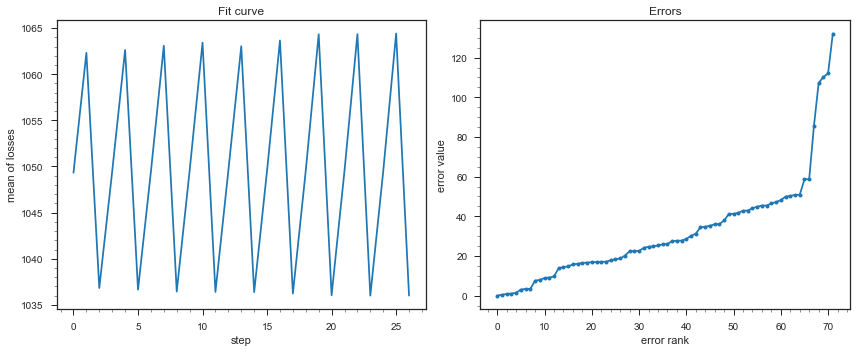

In [42]:
avg_wm_irls = regr.averaging_function('WM', rhofunc=func.Sqrt(0.001), alpha=0.9)
alg_wm_irls = regr.m_regression_irls(Xs, Y, mod_wm_irls, avrfunc=avg_wm_irls, h=0.001, n_iter2=70, verbose=1)
err_wm_irls = regr.plot_losses_and_errors(alg_wm_irls, Xs, Y)

In [34]:
mod_swm_irls = model.LinearModel(1)
mod_swm_irls.init()

[0.08543248 0.59584368] 2


K=22 param=[-26.96324093   0.38451101]


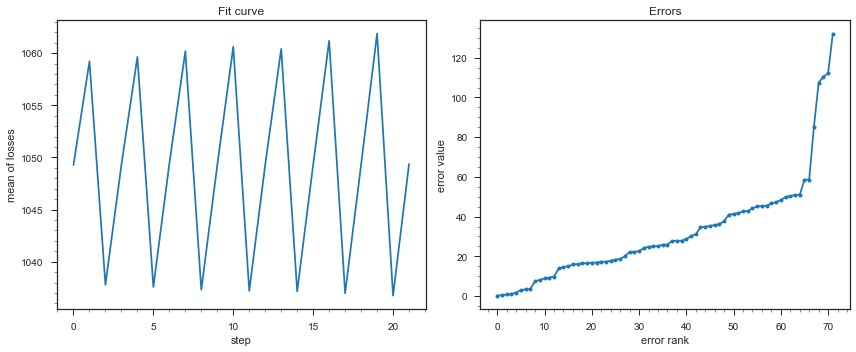

In [41]:
avg_swm_irls = regr.averaging_function('SWM', rhofunc=func.Sqrt(0.001), alpha=0.9)
alg_swm_irls = regr.m_regression_irls(Xs, Y, mod_swm_irls, avrfunc=avg_swm_irls, h=0.001, tol=1.0e-8, verbose=1)
err_swm_irls = regr.plot_losses_and_errors(alg_swm_irls, Xs, Y)

In [36]:
# Err = np.abs(Y - mod2.evaluate_all(Xs))

# X1, X1_ = array_exclude_outliers(X, Err, 7) 
# Y1, Y1_ = array_exclude_outliers(Y, Err, 7) 
# X1s = X1.reshape(-1,1)

In [37]:
mod_r_irls = model.LinearModel(1)
mod_r_irls.init()

[0.51137015 0.17062363] 2


K=2 param=[-13.56499442   0.38221003]


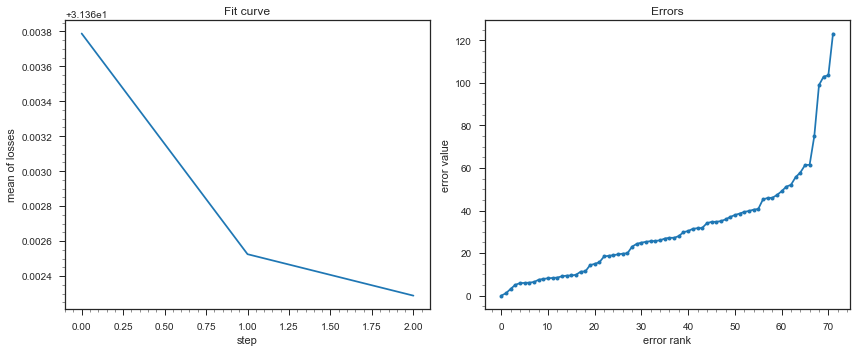

In [39]:
alg_r_irls = regr.r_regression_irls(Xs, Y, mod_r_irls, rhofunc=func.Sqrt(0.001), n_iter=1500, verbose=1)
err_r_irls = regr.plot_losses_and_errors(alg_r_irls, Xs, Y)

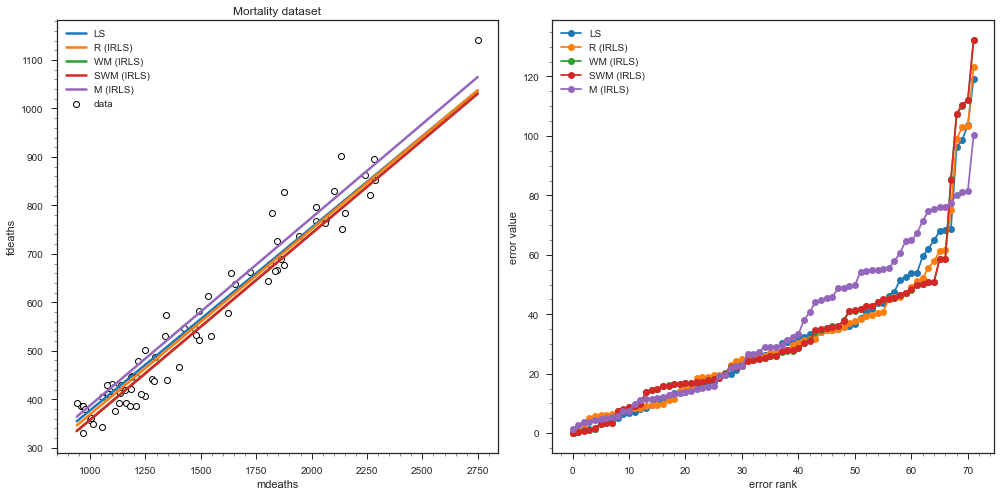

In [48]:
plt.figure(figsize=(14.0, 7.0))
plt.subplot(1,2,1)
plt.title('Mortality dataset')
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidths=1., label='data')
plt.plot(X0, mod_ls.evaluate_all(X0.reshape(-1,1)), linewidth=2.5, label=r'LS')
plt.plot(X0, mod_r_irls.evaluate_all(X0.reshape(-1,1)), linewidth=2.5, label=r'R (IRLS)')
plt.plot(X0, mod_wm_irls.evaluate_all(X0.reshape(-1,1)), linewidth=2.5, label=r'WM (IRLS)')
# plt.plot(X0, mod_wm_ls.evaluate_all(X0.reshape(-1,1)), linewidth=2.5, label=r'WM (LS)')
plt.plot(X0, mod_swm_irls.evaluate_all(X0.reshape(-1,1)), linewidth=2.5, label=r'SWM (IRLS)')
plt.plot(X0, mod_m_irls.evaluate_all(X0.reshape(-1,1)), linewidth=2.5, label=r'M (IRLS)')
plt.minorticks_on()
# plt.grid(1)
plt.xlabel('mdeaths')
plt.ylabel('fdeaths')
plt.legend(loc='best')
plt.subplot(1,2,2)
plt.plot(sorted(np.abs(Y - mod_ls.evaluate_all(Xs))), marker='o', markersize=7, label=r'LS')
plt.plot(sorted(np.abs(Y - mod_r_irls.evaluate_all(Xs))), marker='o', markersize=7, label=r'R (IRLS)')
plt.plot(sorted(np.abs(Y - mod_wm_irls.evaluate_all(Xs))), marker='o', markersize=7, label=r'WM (IRLS)')
# plt.plot(sorted(np.abs(Y - mod_wm_ls.evaluate_all(Xs))), marker='o', markersize=7, label=r'WM (LS)')
plt.plot(sorted(np.abs(Y - mod_swm_irls.evaluate_all(Xs))), marker='o', markersize=7, label=r'SWM (IRLS)')
plt.plot(sorted(np.abs(Y - mod_m_irls.evaluate_all(Xs))), marker='o', markersize=7, label=r'M (IRLS)')
plt.minorticks_on()
# plt.grid(1)
plt.ylabel('error value')
plt.xlabel('error rank')
# plt.ylim(-0.1, 4.5)
# plt.xlim(-1, 48)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('fig/mortality_plots.jpg')
plt.show()

In [22]:
41/47

0.8723404255319149

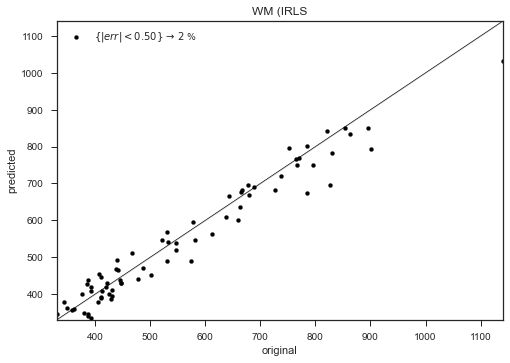

In [46]:
def plot_yy(Xs, Y, mod, label, b=0.1):
    Yp = mod.evaluate_all(Xs)
    E = np.abs(Y - Yp)
    c = sum(E < b) / len(E) * 100
    ymax, ymin = np.max(Y), np.min(Y)
    ypmax, ypmin = np.max(Yp), np.min(Yp)
    ymax = max(ymax, ypmax)
    ymin = min(ymin, ypmin)
    plt.plot([ymin, ymax], [ymin, ymax], color='k', linewidth=0.66)
    plt.fill_between([ymin, ymax], [ymin-b, ymax-b], [ymin+b, ymax+b], color='LightGray')
    plt.scatter(Y, Yp, c='k', s=16, label=r'$\{|err|<%.2f\}\ \to\ %s$ %%' % (b, int(c)))
    plt.title(label)
    plt.ylim(ymin, ymax)
    plt.xlim(ymin, ymax)
    plt.xlabel("original")
    plt.ylabel("predicted")
    plt.legend()

plot_yy(Xs, Y, mod_wm_irls, r'WM (IRLS', 0.5)
plt.show()